Name Fahmida

Labpartner(s) Israt, Zach

In [1]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

**For today's lab you need to install the package cartopy**

In [2]:
# you can install packages here in a notebook with pip or conda, 
# or in the anaconda navigator in the environments tab (reccommended)

# pip install cartopy
# conda install cartopy

In [3]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 6.2

Today we will finish fiunction sharing and do more plotting

# Warmups 6.2

**W.1** (From Zach) Write some code that generates 15 random integers from 1-100. If the integers are divisible by 2 assign them to list "x" if they are divisible by three, assign them to list "y", if they are neither assign them to list "z". 

In [11]:
randomint = np.random.randint(20, size = 100)
randomint

array([ 3,  4, 15, 18, 17, 13, 11,  9, 15,  7,  7, 13, 12, 15,  2, 18, 16,
        7,  3, 12, 17,  6,  3, 12, 16,  4, 17, 10,  3,  7, 16, 14, 12,  8,
       17, 15,  4, 12, 14,  7,  8, 11,  5, 16, 12,  8,  2,  4,  3,  0,  6,
       11,  1,  8,  6,  9,  3, 16, 14, 18, 12, 14, 15, 18, 17, 19, 16, 11,
        2,  2,  2,  4, 17,  3, 12,  2,  7,  8, 17,  7,  6,  7,  6,  9,  0,
        3,  7, 13,  6,  3,  8,  1, 18, 19,  5,  3, 13,  1,  5, 18])

In [12]:
x = []
y = []
z = []

for i in randomint:
    if i % 2 == 0:
        x.append(i)
    elif i % 3 == 0:
        y.append(i)
    else:
        z.append(i)

print(x)
print(y)
print(z)

[4, 18, 12, 2, 18, 16, 12, 6, 12, 16, 4, 10, 16, 14, 12, 8, 4, 12, 14, 8, 16, 12, 8, 2, 4, 0, 6, 8, 6, 16, 14, 18, 12, 14, 18, 16, 2, 2, 2, 4, 12, 2, 8, 6, 6, 0, 6, 8, 18, 18]
[3, 15, 9, 15, 15, 3, 3, 3, 15, 3, 9, 3, 15, 3, 9, 3, 3, 3]
[17, 13, 11, 7, 7, 13, 7, 17, 17, 7, 17, 7, 11, 5, 11, 1, 17, 19, 11, 17, 7, 17, 7, 7, 7, 13, 1, 19, 5, 13, 1, 5]


**W.2** Plot your lists together in some sensible way. Zach suggests a histogram with different colors for each list

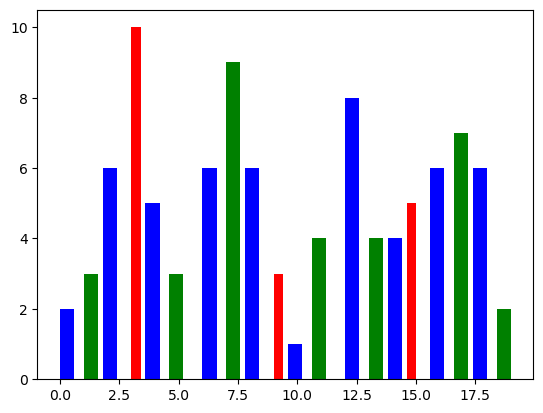

In [13]:
x = np.array(x)
y = np.array(y)
z = np.array(z)


fig, ax = plt.subplots()
ax.hist(x,bins = 30, color = 'blue')
ax.hist(y, bins = 30, color = 'red')
ax.hist(z,bins = 30,  color = 'green')

plt.show()

# Lecture 6.2

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - continued

### Questions

### Cartopy

Let's take the data we used last time and make the plot publication ready

There are a number of differnt map projections available in Cartopy.  https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

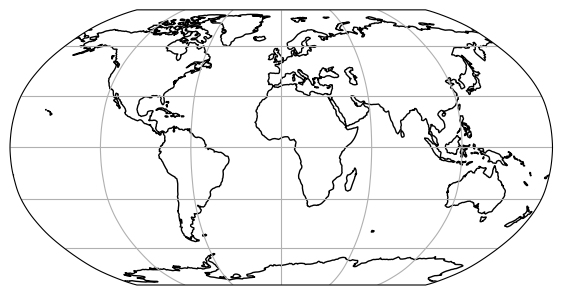

In [36]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

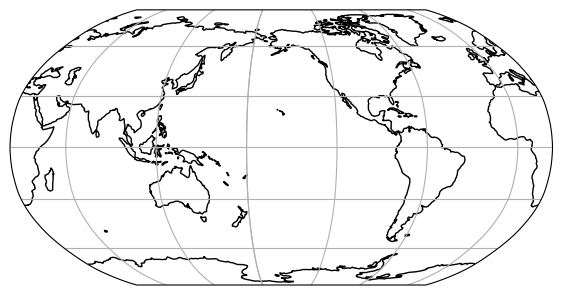

In [37]:
# plot a basic map with no data, rotated, cut it in Africa to focus on ocean 
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the map to 203 degrees East
ax.coastlines(resolution='110m')
ax.gridlines()

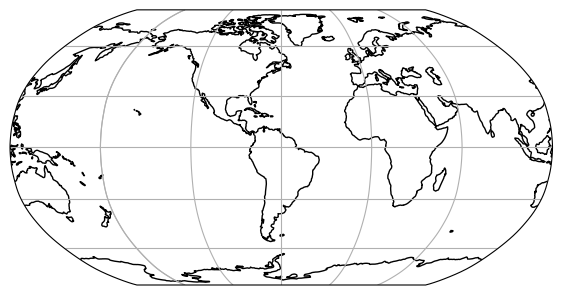

In [38]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300)) #east
ax.coastlines(resolution='110m')
ax.gridlines()

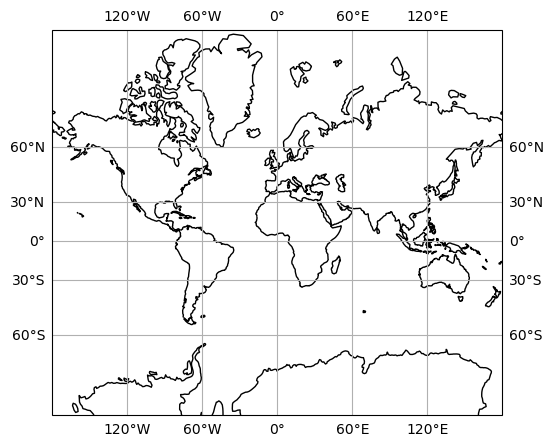

In [39]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

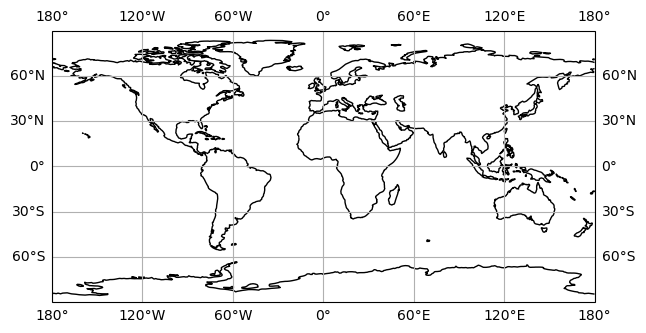

In [40]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

# -60 (60 W) is the same as 300 E (360 degrees in total 360-60W = 300E)

How do I zoom in?

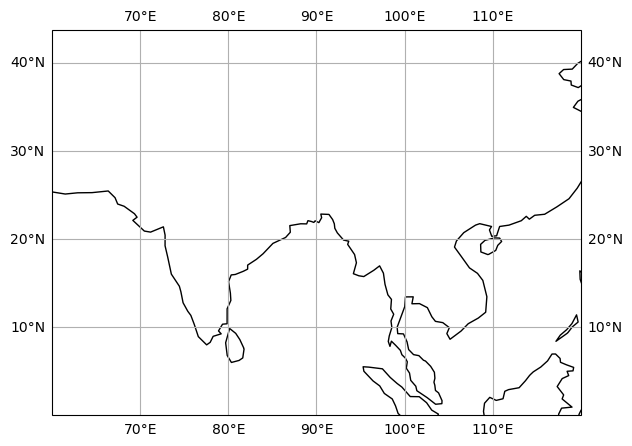

In [41]:
# let's zoom in to S Asia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([60,120, 0,40]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)


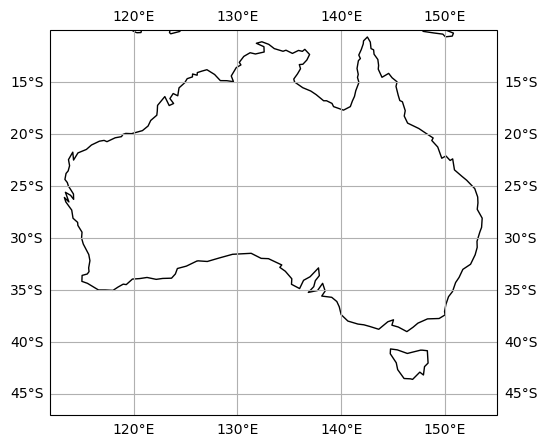

In [42]:
# let's zoom in to Australia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([112,155, -10,-45]) # set the limits of the plot
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

**Moving back to the Gulf of Mexico, we want to set the lat and lon range to match our HYCOM data. How do we find this?**

In [43]:
#insert path or url to file here
file = "https://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2019/031_archv.2019_001_02_2d.nc"

In [44]:
gom_data = xr.open_dataset(file, decode_times=False)

In [45]:
gom_data

<xarray.Dataset>
Dimensions:                (MT: 1, Latitude: 385, Longitude: 525)
Coordinates:
    Date                   (MT) float64 ...
  * Latitude               (Latitude) float32 18.09 18.13 18.17 ... 31.93 31.96
  * Longitude              (Longitude) float32 -98.0 -97.96 ... -77.08 -77.04
  * MT                     (MT) float64 4.31e+04
Data variables:
    mixed_layer_thickness  (MT, Latitude, Longitude) float32 ...
    ssh                    (MT, Latitude, Longitude) float32 ...
    u_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    v_barotropic_velocity  (MT, Latitude, Longitude) float32 ...
    wnd_ewd                (MT, Latitude, Longitude) float32 ...
    wnd_nwd                (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.6
    title:                           HYCOM
    source:                          HYCOM archive file
    experiment:                      01.0
    comment:                         p-grid
    history:                         Mon Jul 18 14:07:43 2022: ncks -x -v sur...
    history_of_appended_files:       Mon Jul 18 14:07:43 2022: Appended file ...
    NCO:                             netCDF Operators version 4.9.8 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  MT

In [46]:
# let's remember what our data looked like, pick a variable to plot

In [47]:
gom_data.Latitude.min()

<xarray.DataArray 'Latitude' ()>
array(18.0916481)

In [48]:
gom_data.Latitude.max()

<xarray.DataArray 'Latitude' ()>
array(31.96064758)

In [49]:
gom_data.Longitude.max()

<xarray.DataArray 'Longitude' ()>
array(-77.04000092)

In [50]:
gom_data.Longitude.min()

<xarray.DataArray 'Longitude' ()>
array(-98.)

C:\Users\fahmi\anaconda3\envs\OCS4001\Lib\site-packages\cartopy\mpl\geoaxes.py:872: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


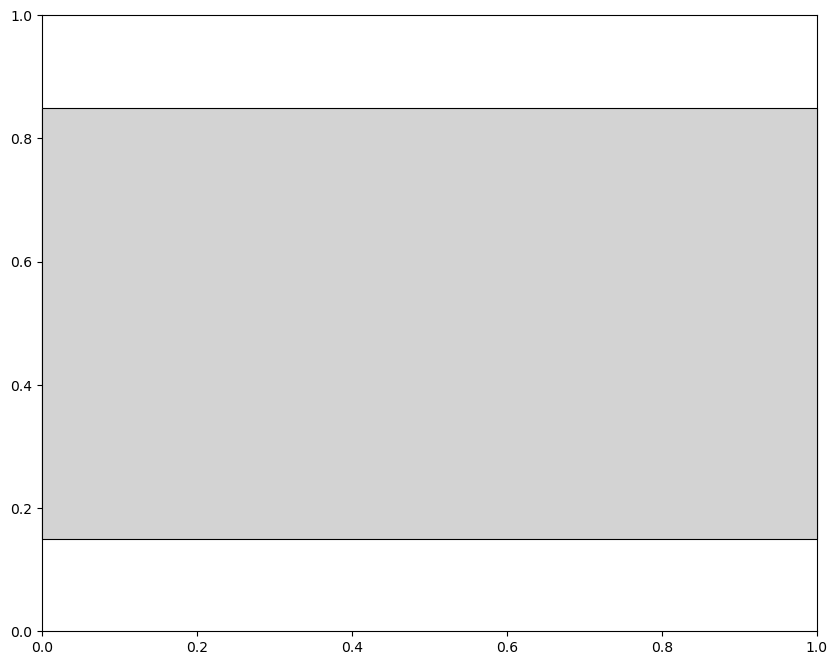

In [51]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([18.0916481,31.96064758,-77.04000092,-98.0]) #play around later

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

Now let's add some data

In [52]:
# what does our data look like again?
#gom_data.surf_el

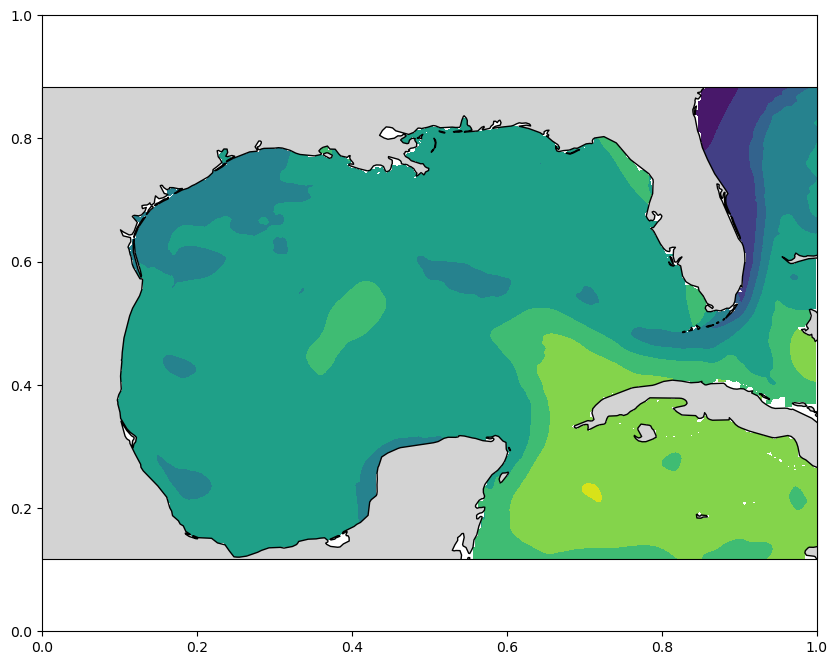

In [53]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call
    

Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in to make a publication ready plot

C:\Users\fahmi\anaconda3\envs\OCS4001\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\fahmi\anaconda3\envs\OCS4001\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


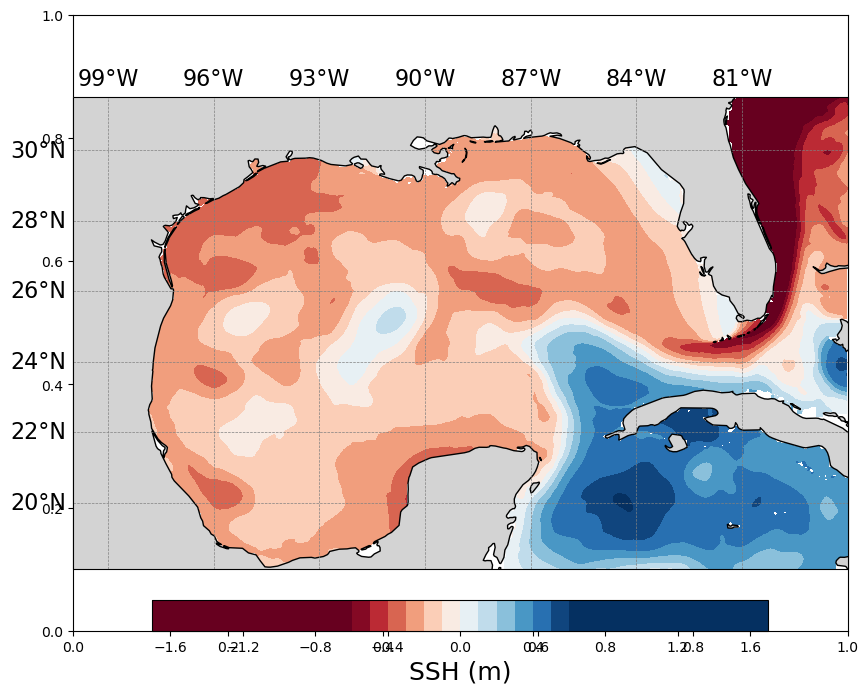

In [54]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var =  gom_data.ssh[0,:,:]

#Contours the data on tho the map projection
step = np.arange(-1.7,1.8,0.1)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu', 
                vmin = -0.6,vmax = 0.6,levels = step) # projection is needed in every plot call
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("SSH" +' (m)', size = 18)


# ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
#     #and sets the grid lines on the graph
# ##Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 16}
gl.ylabel_style = {'size' : 16}

## Lab 6.2

**E.0** Finish Lab 6.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4. Let me know if this feels like a good pace

Done!

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

NameError: name 'mens_rowing' is not defined

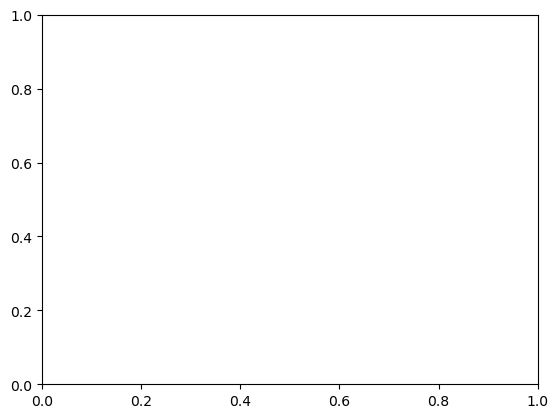

In [34]:
# Adding error bars examples in box plots
fig, ax = plt.subplots()

# Add "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

# Add "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c= climate_change.index)

##set plot style 
plt.set.style('style_name')

##set figure size
fig.set_size_inches([5,3])  #widht and hheight 

## save a figure as png or jpg
fig.savefig('name_figure.png or .jpg', quality = 50, dpi = 300) #set quality between 1-100 and dpi


**E.3** Make a plot of a different variable for the HYCOM data. Play around with colormaps and contourlines to make it your own. Post your plot on the class slack #random channel

In [133]:
lon_min = gom_data.Longitude.min()
lon_max =  gom_data.Longitude.max()
lat_min = gom_data.Latitude.min()
lat_max = gom_data.Latitude.max()

In [135]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import Normalize
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

C:\Users\fahmi\AppData\Local\Temp\ipykernel_18712\4147266788.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu_r')


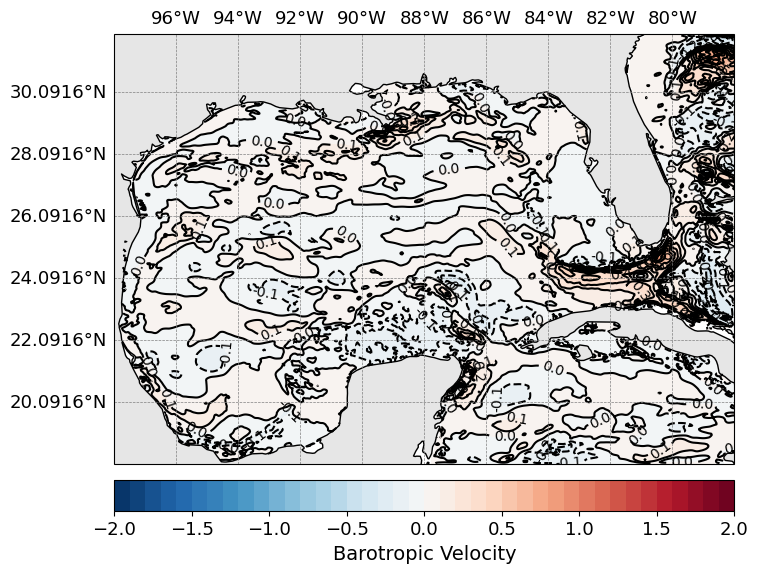

In [137]:
# Define figure and map projection
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.set_extent([lon_min, -78, lat_min, lat_max])  

# Add land feature with customized style
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black', facecolor='0.9')
ax.add_feature(land_50m)

# Extract the data
x = gom_data.Longitude
y = gom_data.Latitude
var = gom_data.u_barotropic_velocity[0, :, :]

# Define colormap, normalization, and contour levels
cmap = plt.cm.get_cmap('RdBu_r')  
norm = Normalize(vmin=-2, vmax=2)   

# Contour plot with filled colors
step = np.arange(-2, 2.1, 0.1)  
p = ax.contourf(x, y, var, transform=ccrs.PlateCarree(), cmap=cmap, levels=step, norm=norm)

# Add contour lines with labels
cs = ax.contour(x, y, var, colors='black', levels=step, transform=ccrs.PlateCarree())
ax.clabel(cs, inline=True, fontsize=10, fmt='%1.1f')  # Label the contour lines with inline labels

# Customize colorbar
cbar = plt.colorbar(p, orientation='horizontal', pad=0.02, fraction=0.05, ticks=np.arange(-2, 2.1, 0.5))
cbar.set_label("Barotropic Velocity", size=14)
cbar.ax.tick_params(labelsize=13)  

# Customize gridlines with formatted labels and custom intervals
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = True
gl.left_labels = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 13}
gl.ylabel_style = {'size': 13}

# Customize gridline intervals for more lines
gl.xlocator = mticker.FixedLocator(np.arange(lon_min, -78, 2))  
gl.ylocator = mticker.FixedLocator(np.arange(lat_min, lat_max, 2))  

# Display the final plot
plt.show()

### This week's project:

**E.4** Download some data from the ISIMIP data archive (https://data.isimip.org/) and plot it using cartopy. ISIMIP provides bias-corrected data for past and future climate simulations used for impacts studies world wide. Let's start with some maximum atmospheric surface temperature data in the historical period (1850-2014 for CMIP6). We want climate forcing data for ISIMIP3b, which are the lastest (CMIP6) climate projections. 

* https://data.isimip.org/search/tree/ISIMIP3b/InputData/climate/
* Click atmopsheric forcing
* Click GFDL... This is one of NOAA-GFDL's climate models (ESM4)
* Click historical

All of the variable names are in CMIP lingo. Sadly, there is no easy cheat sheet. But you want tas, which is "temperature of air at surface". Let's use the tasmax, the maximum daily surface air temperature
* Click tasmax
* Click files to see all the available files.
  
Here you have a choice, you can download an etire file (note the size) or you can use the "configure download" button, which has subsetting by space or country, as well as time opitons. You can click on a file name to see more info.
* Click on "download file" for the 1851-1860 file. Just grab the whole file, it will take a minute to download.
* Load up the data into xarray and plot the maximum of this dataset (so max over the decade for each gridcell. You just use a max function for this, no loops needed).
* Plot using cartopy to make it pretty. Put some sensible lables on it, etc. Maybe add some country boundaries.

In [97]:
#Bring the file 

file_path2 = "C:/Users/fahmi/OneDrive - Louisiana State University/Fall 2024/OCS 4001/Lab 6/gfdl-esm4_r1i1p1f1_w5e5_historical_tasmax_global_daily_1851_1860.nc"
isimip_1850 = xr.open_dataset(file_path2, decode_times=False)

In [98]:
isimip_1850

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...

In [99]:
# get the max values
isimip_1850_max = isimip_1850.max(dim='time')
isimip_1850_max

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 274.9 274.9 274.9 274.9 ... 258.2 258.3 258.3

In [100]:
#Save to netcdf
isimip_1850_max.to_netcdf('isimip_1850_max.nc')

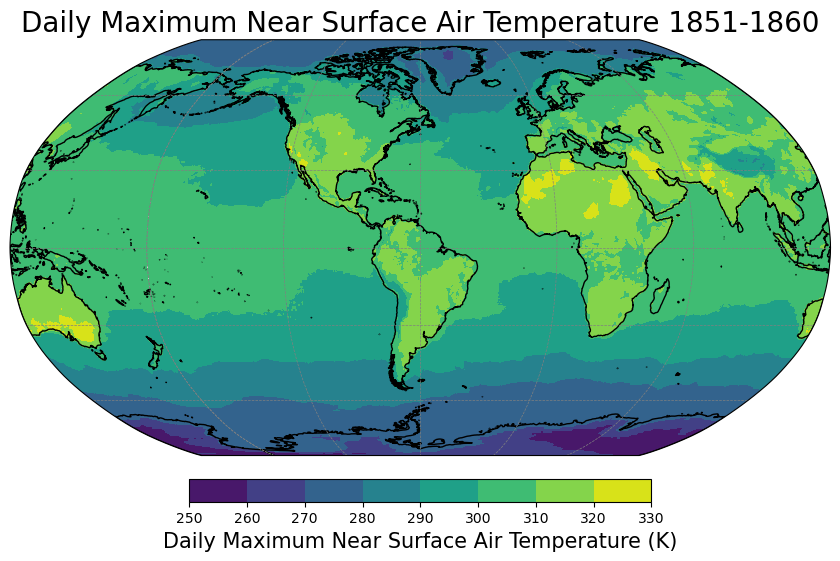

In [101]:
#Using the Robinson projection
fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))  
ax.set_title('Daily Maximum Near Surface Air Temperature 1851-1860', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = isimip_1850_max.lon
y = isimip_1850_max.lat
var = isimip_1850_max.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Daily Maximum Near Surface Air Temperature' +' (K)', size = 15)

# ##Set the grid lines without labels to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

**E.5** Now make a second plot using ISIMP data for a future climate projection. Following the same steps as above, get the GFDL tasmax data for the future climate scenario SSP3-7.0 (higher emissions scenario) for 2051-2060. Again, calculate the maximum at each gridpoint for this data set. This is the future maximum daily temperature for that decade. Make your plot nice.

In [116]:
#gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmax_global_daily_2051_2060

file_path3 = "C:/Users/fahmi/OneDrive - Louisiana State University/Fall 2024/OCS 4001/Lab 6/gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmax_global_daily_2051_2060.nc"
isimip_2050 = xr.open_dataset(file_path3, decode_times=False)

In [111]:
isimip_2050

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...

In [112]:
# get the max values
isimip_2051_max = isimip_2051.max(dim='time')
isimip_2051_max

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 275.3 275.3 275.4 275.3 ... 255.0 255.3 255.0

In [113]:
#Save to netcdf
isimip_2051_max.to_netcdf('isimip_2051_max.nc')

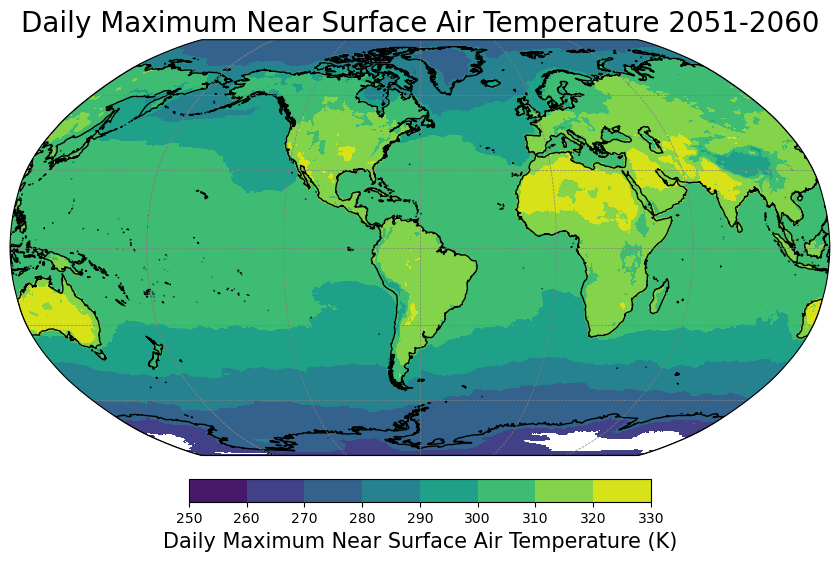

In [119]:
fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))  
ax.set_title('Daily Maximum Near Surface Air Temperature 2051-2060', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = isimip_2051_max.lon
y = isimip_2051_max.lat
var = isimip_2051_max.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Daily Maximum Near Surface Air Temperature' +' (K)', size = 15)

# ##Set the grid lines without labels to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

**E.6** Now plot the anomaly between the two, 2050's - 1850's. Use a diverging colormap (light in the middle), centered on zero. What is the outlook for your country of orgin? Answer in full sentances with specific numbers.

In [117]:
## Estimate the anomaly
anomaly_2050_1850 = isimip_2051_max - isimip_1850_max
anomaly_2050_1850

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 0.4561 0.4357 0.4763 ... -3.239 -2.983 -3.259

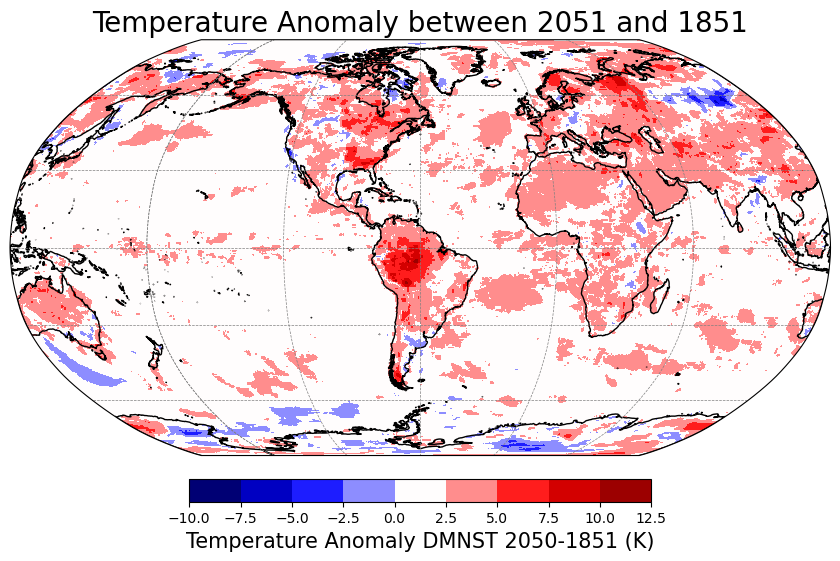

In [120]:
fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))  
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_title('Temperature Anomaly between 2051 and 1851', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = anomaly_2050_1850.lon
y = anomaly_2050_1850.lat
var = anomaly_2050_1850.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap='seismic')

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Temperature Anomaly DMNST 2050-1851' +' (K)', size = 15)

# ##Set the grid lines without labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

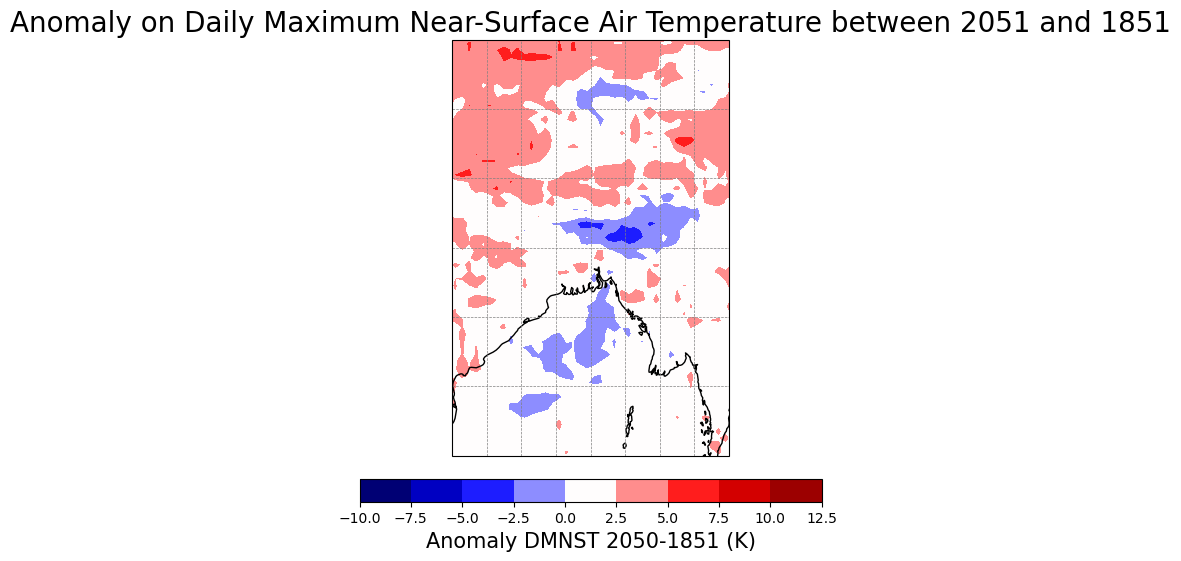

In [132]:
#Zoom in to Bangladesh

fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.PlateCarree()))  
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('Anomaly on Daily Maximum Near-Surface Air Temperature between 2051 and 1851', size = 20)
ax.set_extent([80, 100, 10, 40]) ##zoom into Honduras

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = anomaly_2050_1850.lon
y = anomaly_2050_1850.lat
var = anomaly_2050_1850.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap='seismic')

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Anomaly DMNST 2050-1851' +' (K)', size = 15)

# ##Set the grid lines without labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

What is the outlook for your country of origin?

The anomaly between 2051 and 1851 indicates that the Daily Maximum Surface Air Temperature in southern Bangladesh is expected to rise between -5.0 and -0.0 K degrees and in the northern part 2.5 k and 5.0 k degrees.  

**E.7** How could you potentially use this kind of data (future climate projections) in your research? Do some brainstorming. Write down your thoughts here.

Climate data plays a crucial role in the benefit-cost analysis (BCA) of flood mitigation projects by helping quantify the potential future risks and benefits of various mitigation strategies. Using historical climate data and future projections (e.g., rainfall intensity, frequency of extreme weather events, and sea level rise), analysts can estimate the likelihood and severity of future floods. This information helps assess the potential damage avoided by implementing mitigation measures, such as levees, drainage systems, or land-use changes. The avoided costs—such as damage to property, infrastructure, and loss of life—are weighed against the costs of implementing these mitigation strategies.

By incorporating climate projections, the BCA can account for the increasing frequency and severity of floods due to climate change, ensuring that flood mitigation investments are justified and that long-term resilience is factored into decision-making.